<a href="https://colab.research.google.com/github/kaji951/TodoApp/blob/main/graduationResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
input()

Hi


'Hi'

In [2]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

In [12]:
audiofile = "audio.wav"
second = 5
print(f"Speak to your microphone {second} sec...")
record(second, audiofile)
print("Done!")

Speak to your microphone 5 sec...


<IPython.core.display.Javascript object>

Done!


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


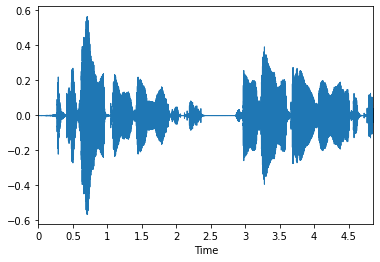

In [13]:
# 波形プロットにより録音を確認
# UserWarning: PySoundFile failed. Trying audioread instead. が出るが、無視して問題ない
import librosa
import librosa.display
speech, rate = librosa.load(audiofile, sr=16000)
librosa.display.waveplot(speech, sr=rate)

In [5]:
!pip install git+https://github.com/openai/whisper.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-7or3p8_x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-7or3p8_x
  Resolved https://github.com/openai/whisper.git to commit 7858aa9c08d98f75575035ecd6481f462d66ca27
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230124-py3-none-any.whl size=1179424 sha256=d81b1e6f7096a6b78964057870bb8b10dc4ef6fced29299901a6422947ef0a9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-0aafq5je/wheels/a7/70/18/b7693c07b1d18b3dafb328f5d0496aa0d41a9c09ef332fd8e6
Successfully built opena

In [6]:
import whisper

In [7]:
model = whisper.load_model("medium")

100%|██████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 122MiB/s]


In [14]:
result = model.transcribe("/content/audio.wav")
print(result["text"])

1行目と2行目を入れ替え3行目と4行目を入れ替え


In [ ]:
result = model.transcribe("/content/sample_data/画面収録 2022-04-02 17.44.20.mov")
print(result["text"])

hernはいこんばんは 打ち風ですmememememememememememememememememememememememememememememememememememememememememememememememememememememememe藤井風のオールナイト日本memememememememememememememe


In [ ]:
result = model.transcribe("/content/sample_data/画面収録 2022-04-02 17.44.20.mov", verbose=True)
print(result["text"])

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Japanese
[00:00.000 --> 00:29.640]  ううう
[00:30.000 --> 00:36.380] This place could be much brighter than tomorrow
[00:36.380 --> 00:39.180] And if you really try
[00:39.180 --> 00:42.680] You'll find there's no need to cry
[00:42.680 --> 00:49.060] In this place you feel there's no hurt or sorrow
[00:49.060 --> 00:52.200] There are ways to get there
[00:52.200 --> 00:55.260] If you care enough for the living
[00:55.260 --> 00:58.140] Make a little space
[00:58.140 --> 01:00.880] Make a better place
[01:00.880 --> 01:02.940] Heal the
[01:02.940 --> 01:05.880] Heal the world
[01:05.880 --> 01:09.320] Make it a better place
[01:09.320 --> 01:11.820] For you and for me
[01:11.820 --> 01:14.820] And the entire human race
[01:14.820 --> 01:18.200] There are people dying
[01:18.200 --> 01:21.200] If you care enough for the living
[01:21.200 --> 01:22.760] Make a better place
[01:22

In [ ]:
result = model.transcribe("/content/sample_data/ムービー５.mov")
print(result["text"])

 Good morning, Garden Hotel. Can I help you? Yes, please. Do you have any vacancies for next Friday, please? Yes, we do. Would you like a single or a double? A double, please. And for how many nights? For one night, please. Fine. How much is it? It's 99 pounds per night. That's fine. Okay, could I have your name, please? Yes, it's Kajikawa. Could you spell that, please? Yes, it's K-A-J-I-K-A-W-A. Thank you. And could I have your phone number, please? Yes, sure. It's 060-547-979-1003.


In [ ]:
result = model.transcribe("/content/sample_data/ムービー５.mov", verbose=True)
print(result["text"])

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:07.000]  Good morning, Garden Hotel. Can I help you?
[00:08.000 --> 00:15.000]  Yes, please. Do you have any vacancies for next Friday, please?
[00:16.000 --> 00:21.000]  Yes, we do. Would you like a single or a double?
[00:22.000 --> 00:24.000]  A double, please.
[00:25.000 --> 00:28.000]  And for how many nights?
[00:28.000 --> 00:32.000]  For one night, please.
[00:33.000 --> 00:38.000]  Fine. How much is it?
[00:39.000 --> 00:45.000]  It's 99 pounds per night. That's fine.
[00:46.000 --> 00:50.000]  Okay, could I have your name, please?
[00:50.000 --> 00:57.000]  Yes, it's Kajikawa. Could you spell that, please?
[00:58.000 --> 01:07.000]  Yes, it's K-A-J-I-K-A-W-A. Thank you.
[01:08.000 --> 01:11.000]  And could I have your phone number, please?
[01:11.000 --> 01:26.000]  Yes, sure. It's 060-547-979-1003.
 Good morning, Garden Hotel. Can I help 

In [ ]:
!python WhiperStreaming.py

Traceback (most recent call last):
  File "WhiperStreaming.py", line 8, in <module>
    from whisper.audio import SAMPLE_RATE, N_FRAMES, HOP_LENGTH, CHUNK_LENGTH, pad_or_trim, log_mel_spectrogram
ModuleNotFoundError: No module named 'whisper'


In [ ]:
string = input("文字列を入力してください：")
print("文字列", string, "が入力されました。")

文字列を入力してください：aa
文字列 aa が入力されました。


In [ ]:
'''import tkinter as tk
import tkinter.ttk as ttk

# メインウィンドウの作成
root = tk.Tk()
root.title("Tkinter Separator")

root.rowconfigure(0, minsize=250, weight=1)
root.columnconfigure(0, minsize=200, weight=1)
root.columnconfigure(2, minsize=200, weight=1)

# Styleの指定
style = ttk.Style()
style.configure("blue.TSeparator", background="blue")

### Widgetの作成 ###
frame_left = tk.Frame(root)
separator = ttk.Separator(root, orient="vertical", style="blue.TSeparator")
frame_right = tk.Frame(root)

label1 = tk.Label(frame_left, text="label1", relief="raised", height=15, bg="white")
label2 = tk.Label(frame_right, text="label2", relief="raised", height=15, bg="white")

### 配置 ###
frame_left.grid(row=0, column=0, rowspan=2, sticky="nsew", padx=20, pady=20)
separator.grid(row=0, rowspan=2, column=1, sticky="ns")
frame_right.grid(row=0, column=2, sticky="nsew", padx=20, pady=20)

label1.pack(fill="both")
label2.pack(fill="both")

root.mainloop()'''

'import tkinter as tk\nimport tkinter.ttk as ttk\n\n# メインウィンドウの作成\nroot = tk.Tk()\nroot.title("Tkinter Separator")\n\nroot.rowconfigure(0, minsize=250, weight=1)\nroot.columnconfigure(0, minsize=200, weight=1)\nroot.columnconfigure(2, minsize=200, weight=1)\n\n# Styleの指定\nstyle = ttk.Style()\nstyle.configure("blue.TSeparator", background="blue")\n\n### Widgetの作成 ###\nframe_left = tk.Frame(root)\nseparator = ttk.Separator(root, orient="vertical", style="blue.TSeparator")\nframe_right = tk.Frame(root)\n\nlabel1 = tk.Label(frame_left, text="label1", relief="raised", height=15, bg="white")\nlabel2 = tk.Label(frame_right, text="label2", relief="raised", height=15, bg="white")\n\n### 配置 ###\nframe_left.grid(row=0, column=0, rowspan=2, sticky="nsew", padx=20, pady=20)\nseparator.grid(row=0, rowspan=2, column=1, sticky="ns")\nframe_right.grid(row=0, column=2, sticky="nsew", padx=20, pady=20)\n\nlabel1.pack(fill="both")\nlabel2.pack(fill="both")\n\nroot.mainloop()'